In [1]:
import Helpful_Functions as myfun
import warnings
from datetime import date

import scipy.ndimage as ndimage
from scipy import interpolate
# from params import *
# from load_sla import *
import os
import pandas as pd
import xarray as xr
from datetime import date
from math import exp, pi, sin, cos, tan, sqrt, floor, ceil, log
import numpy as np
import scipy.sparse.linalg as las
from scipy import sparse
import scipy.linalg as la
import scipy.signal as sg
import scipy.interpolate as ip
import seawater
from matplotlib import pyplot as plt
from matplotlib import patches as pch
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from geopy import distance
import sklearn
from sklearn.metrics import mean_squared_error
# import pydap
import gsw # subpackage info: https://teos-10.github.io/GSW-Python/gsw.html
import datetime
from datetime import datetime
import numpy as np
import xarray as xr
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import urllib
import os
import scipy
from scipy.io import loadmat
from scipy import stats
from scipy import signal
import scipy.special as sc
import cartopy
import cartopy.crs as ccrs
from datetime import timedelta
import re
import math
from numpy.polynomial.polynomial import polyfit
import scipy.optimize
from scipy.optimize import curve_fit
from time import time 
%matplotlib inline
%config inlinebackend.figure_format='retina'


# Preliminary Analysis of data from the M2 and M3 Weddell Moorings

July 2023

# M2

In [2]:
### M2 time series data

folder_name = 'M2_netCDF_1999_2023'

ds1 = xr.open_dataset(folder_name+'/Weddell_M2_SBE39_t229.nc')
ds2 = xr.open_dataset(folder_name+'/Weddell_M2_SBE39_tp1232.nc')
ds3 = xr.open_dataset(folder_name+'/Weddell_M2_SBE39_tp1311.nc')
ds4 = xr.open_dataset(folder_name+'/Weddell_M2_SBE37_u6557.nc')
ds5 = xr.open_dataset(folder_name+'/Weddell_M2_SBE37_u14765.nc')
ds6 = xr.open_dataset(folder_name+'/Weddell_M2_Aquadopp6k_aq2807.nc')
ds7 = xr.open_dataset(folder_name+'/Weddell_M2_Aquadopp6k_aq9380.nc')

### FIX PRESSURES

Calculate pressure from depth using the GSW package

So I can get the correct potential temperatures.

In [3]:
lat = 62.36
lon = 43.1

z = -1*float(ds1.attrs['sensor depth'].split()[0])
p = gsw.conversions.p_from_z(z, lat, geo_strf_dyn_height=0, sea_surface_geopotential=0)
ds1.attrs['pressure'] = p

z = -1*float(ds2.attrs['sensor depth'].split()[0])
p = gsw.conversions.p_from_z(z, lat, geo_strf_dyn_height=0, sea_surface_geopotential=0)
ds2.attrs['pressure'] = p

z = -1*float(ds3.attrs['sensor depth'].split()[0])
p = gsw.conversions.p_from_z(z, lat, geo_strf_dyn_height=0, sea_surface_geopotential=0)
ds3.attrs['pressure'] = p

z = -1*float(ds4.attrs['sensor depth'].split()[0])
p = gsw.conversions.p_from_z(z, lat, geo_strf_dyn_height=0, sea_surface_geopotential=0)
ds4.attrs['pressure'] = p

z = -1*float(ds5.attrs['sensor depth'].split()[0])
p = gsw.conversions.p_from_z(z, lat, geo_strf_dyn_height=0, sea_surface_geopotential=0)
ds5.attrs['pressure'] = p

z = -1*float(ds6.attrs['sensor depth'].split()[0])
p = gsw.conversions.p_from_z(z, lat, geo_strf_dyn_height=0, sea_surface_geopotential=0)
ds6.attrs['pressure'] = p

z = -1*float(ds7.attrs['sensor depth'].split()[0])
p = gsw.conversions.p_from_z(z, lat, geo_strf_dyn_height=0, sea_surface_geopotential=0)
ds7.attrs['pressure'] = p

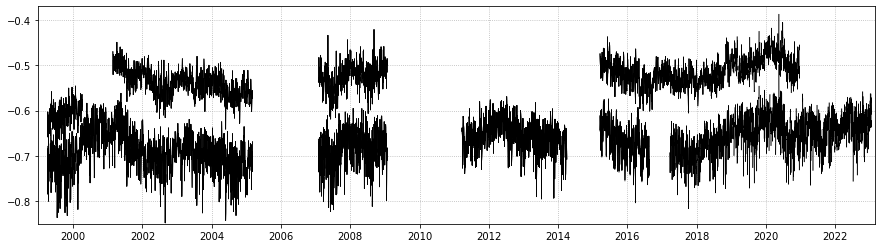

In [4]:
fig, ax = plt.subplots(figsize=(15,4))

colors = ['#FF4136', '#0074D9', '#2ECC40', '#B10DC9', '#FF851B']

# time = np.asarray(ds6.time)
# t = np.asarray(ds6.temperature)#-0.5144
# C = np.asarray(ds5.conductivity)
# p = ds6.attrs['pressure']
# SA = gsw.conversions.SP_from_C(C, t, p)
# CT = gsw.conversions.CT_from_t(SA, t, p)
# PT = gsw.conversions.pt_from_CT(SA, CT)
# plt.plot(time,PT,color = 'k',linewidth=0.5,alpha=1)
# # lbl = str(list(ds6.attrs.values())[0])
# # plt.plot(x,y,
# #          color = '#800080',zorder=0,alpha=1)
window_size=4*24
time = np.asarray(ds4.temperature.rolling(time=window_size, center=True).mean().time)
t = np.asarray(ds4.temperature.rolling(time=window_size, center=True).mean())#-0.5144
C = np.asarray(ds4.conductivity.rolling(time=window_size, center=True).mean())
p = ds4.attrs['pressure']
SA = gsw.conversions.SP_from_C(C, t, p)
CT = gsw.conversions.CT_from_t(SA, t, p)
PT = gsw.conversions.pt_from_CT(SA, CT)
lbl = ds4.attrs['sensor']#+': '+ds4.attrs['sensor depth']
ax.plot(time,PT,color = 'k',linewidth=0.5,alpha=1,label=lbl)


# time = np.asarray(ds3.temperature.rolling(time=window_size, center=True).mean().time)
# t = np.asarray(ds3.temperature.rolling(time=window_size, center=True).mean())#-0.5144
# # C = np.asarray(ds3.conductivity.rolling(time=window_size, center=True).mean())
# p = ds3.attrs['pressure']
# SA = np.full(t.shape,34.645)
# # SA = gsw.conversions.SP_from_C(C, t, p)
# CT = gsw.conversions.CT_from_t(SA, t, p)
# PT = gsw.conversions.pt_from_CT(SA, CT)
# lbl = ds3.attrs['sensor']#+': '+ds4.attrs['sensor depth']
# plt.plot(time,PT,color = colors[1],linewidth=0.5,alpha=1,label=lbl)

# ### ds2
# time = np.asarray(ds2.temperature.rolling(time=window_size, center=True).mean().time)
# t = np.asarray(ds2.temperature.rolling(time=window_size, center=True).mean())#-0.5144
# # C = np.asarray(ds3.conductivity.rolling(time=window_size, center=True).mean())
# p = ds2.attrs['pressure']
# SA = np.full(t.shape,34.645)
# # SA = gsw.conversions.SP_from_C(C, t, p)
# CT = gsw.conversions.CT_from_t(SA, t, p)
# PT = gsw.conversions.pt_from_CT(SA, CT)
# lbl = ds2.attrs['sensor']#+': '+ds4.attrs['sensor depth']
# plt.plot(time,PT,color = colors[2],linewidth=0.5,alpha=1,label=lbl)


# time = np.asarray(ds1.temperature.rolling(time=window_size, center=True).mean().time)
# t = np.asarray(ds1.temperature.rolling(time=window_size, center=True).mean())#-0.5144
# # C = np.asarray(ds3.conductivity.rolling(time=window_size, center=True).mean())
# p = ds1.attrs['pressure']
# SA = np.full(t.shape,34.645)
# # SA = gsw.conversions.SP_from_C(C, t, p)
# CT = gsw.conversions.CT_from_t(SA, t, p)
# PT = gsw.conversions.pt_from_CT(SA, CT)
# lbl = ds1.attrs['sensor']#+': '+ds4.attrs['sensor depth']
# plt.plot(time,PT,color = colors[3],linewidth=0.5,alpha=1,label=lbl)


time = np.asarray(ds5.temperature.rolling(time=window_size, center=True).mean().time)
t = np.asarray(ds5.temperature.rolling(time=window_size, center=True).mean())#-0.5144
C = np.asarray(ds5.conductivity.rolling(time=window_size, center=True).mean())
p = ds5.attrs['pressure']
SA = gsw.conversions.SP_from_C(C, t, p)
CT = gsw.conversions.CT_from_t(SA, t, p)
PT = gsw.conversions.pt_from_CT(SA, CT)
lbl = ds5.attrs['sensor']#+': '+ds5.attrs['sensor depth']
ax.plot(time,PT,color = 'k',linewidth=0.5,alpha=1,label=lbl)


###------------Old M2 data-----------------###
# direcs = os.listdir('Old_M2_netCDF')
direcs = os.listdir('M2_netCDF_1999_2023')

for direc_i in np.arange(len(direcs)):
    # files = os.listdir('Old_M2_netCDF/'+direcs[direc_i])
    
    if direcs[direc_i][-3:] != '.nc' and direcs[direc_i]!='.DS_Store':
    
        files = os.listdir('M2_netCDF_1999_2023/'+direcs[direc_i])
    
    
        for files_i in np.arange(len(files)):
            fn = files[files_i]
            # print(fn)
            # if fn == 'u6557' or fn == '14765'
            
            ds_dummy = xr.open_dataset('M2_netCDF_1999_2023/'+direcs[direc_i]+'/'+fn)
        
            x = ds_dummy.te.time
            y = ds_dummy.te
        
            ### Add calibration correction, taken as the temp calibration at around 4000m in one of the calibration_files files
            t = np.asarray(ds_dummy.te)#-0.5144
            # print(np.asarray(x[-1]))
            C = np.asarray(ds_dummy.sa)
            p = np.asarray(ds_dummy.pr)
            # print(np.nanmean(p))
            # print(np.nanmean(gsw.conversions.z_from_p(p, 62.4, geo_strf_dyn_height=0, sea_surface_geopotential=0)))
            # print('')
            SA = gsw.conversions.SP_from_C(C, t, p)
            CT = gsw.conversions.CT_from_t(SA, t, p)
            PT = gsw.conversions.pt_from_CT(SA, CT)
            pt = np.asarray(ds_dummy.pt)
            # lbl = 
            ax.plot(x,pt,color = 'k',linewidth=0.5,alpha=1)
        
            # x = ds_dummy.te.rolling(time=30*7,min_periods=1, center=True).mean().time
            # y = ds_dummy.te.rolling(time=30*7,min_periods=1, center=True).mean()
            # plt.plot(x,y,color = 'k',linewidth=2.5)
    
import numpy.ma as ma
import matplotlib.dates as mdates
# Set the x-axis tick labels to show every other year
years = mdates.YearLocator()
date_format = mdates.DateFormatter('%Y')
# Set the x-axis ticks to show every 2 years
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(date_format)

plt.ylim(-0.85,-0.37)
# plt.xlim(np.datetime64('2019-01-01T00:00:00.000000000'),np.datetime64('2023-05-01T00:00:00.000000000'))
plt.xlim(np.datetime64('1999-01-01T00:00:00.000000000'),np.datetime64('2023-03-01T00:00:00.000000000'))

# plt.xlim(np.datetime64('1999-01-01T00:00:00.000000000'),np.datetime64('2023-04-01T00:00:00.000000000'))
# plt.legend(ncol=5)
plt.grid(linestyle='dotted')


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


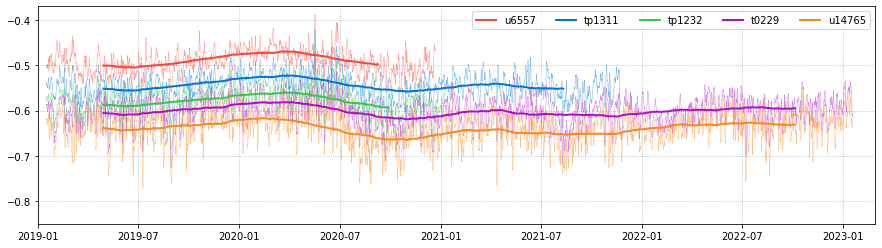

In [5]:
plt.figure(figsize=(15,4))


colors = ['#FF4136', '#0074D9', '#2ECC40', '#B10DC9', '#FF851B']

window_size=4*24

time = np.asarray(ds4.temperature.rolling(time=window_size, center=True).mean().time)
t = np.asarray(ds4.temperature.rolling(time=window_size, center=True).mean())#-0.5144
C = np.asarray(ds4.conductivity.rolling(time=window_size, center=True).mean())
p = ds4.attrs['pressure']
SA = gsw.conversions.SP_from_C(C, t, p)
CT = gsw.conversions.CT_from_t(SA, t, p)
PT = gsw.conversions.pt_from_CT(SA, CT)
lbl = ds4.attrs['sensor']#+': '+ds4.attrs['sensor depth']
plt.plot(time,PT,color = colors[0],linewidth=0.5,alpha=0.5)


time = np.asarray(ds3.temperature.rolling(time=window_size, center=True).mean().time)
t = np.asarray(ds3.temperature.rolling(time=window_size, center=True).mean())#-0.5144
# C = np.asarray(ds3.conductivity.rolling(time=window_size, center=True).mean())
p = ds3.attrs['pressure']
SA = np.full(t.shape,34.645)
# SA = gsw.conversions.SP_from_C(C, t, p)
CT = gsw.conversions.CT_from_t(SA, t, p)
PT = gsw.conversions.pt_from_CT(SA, CT)
lbl = ds3.attrs['sensor']#+': '+ds4.attrs['sensor depth']
plt.plot(time,PT,color = colors[1],linewidth=0.5,alpha=0.5)

### ds2
time = np.asarray(ds2.temperature.rolling(time=window_size, center=True).mean().time)
t = np.asarray(ds2.temperature.rolling(time=window_size, center=True).mean())#-0.5144
# C = np.asarray(ds3.conductivity.rolling(time=window_size, center=True).mean())
p = ds2.attrs['pressure']
SA = np.full(t.shape,34.645)
# SA = gsw.conversions.SP_from_C(C, t, p)
CT = gsw.conversions.CT_from_t(SA, t, p)
PT = gsw.conversions.pt_from_CT(SA, CT)
lbl = ds2.attrs['sensor']#+': '+ds4.attrs['sensor depth']
plt.plot(time,PT,color = colors[2],linewidth=0.5,alpha=0.5)


time = np.asarray(ds1.temperature.rolling(time=window_size, center=True).mean().time)
t = np.asarray(ds1.temperature.rolling(time=window_size, center=True).mean())#-0.5144
# C = np.asarray(ds3.conductivity.rolling(time=window_size, center=True).mean())
p = ds1.attrs['pressure']
SA = np.full(t.shape,34.645)
# SA = gsw.conversions.SP_from_C(C, t, p)
CT = gsw.conversions.CT_from_t(SA, t, p)
PT = gsw.conversions.pt_from_CT(SA, CT)
lbl = ds1.attrs['sensor']#+': '+ds4.attrs['sensor depth']
plt.plot(time,PT,color = colors[3],linewidth=0.5,alpha=0.5)


time = np.asarray(ds5.temperature.rolling(time=window_size, center=True).mean().time)
t = np.asarray(ds5.temperature.rolling(time=window_size, center=True).mean())#-0.5144
C = np.asarray(ds5.conductivity.rolling(time=window_size, center=True).mean())
p = ds5.attrs['pressure']
SA = gsw.conversions.SP_from_C(C, t, p)
CT = gsw.conversions.CT_from_t(SA, t, p)
PT = gsw.conversions.pt_from_CT(SA, CT)
lbl = ds5.attrs['sensor']#+': '+ds5.attrs['sensor depth']
plt.plot(time,PT,color = colors[4],linewidth=0.5,alpha=0.5)




### 7-month rolling mean
window_size=4*24*30*7
time = np.asarray(ds4.temperature.rolling(time=window_size, center=True).mean().time)
t = np.asarray(ds4.temperature.rolling(time=window_size, center=True).mean())#-0.5144
C = np.asarray(ds4.conductivity.rolling(time=window_size, center=True).mean())
p = ds4.attrs['pressure']
SA = gsw.conversions.SP_from_C(C, t, p)
CT = gsw.conversions.CT_from_t(SA, t, p)
PT = gsw.conversions.pt_from_CT(SA, CT)
lbl = ds4.attrs['sensor']#+': '+ds4.attrs['sensor depth']
plt.plot(time,PT,color = colors[0],linewidth=2,alpha=1,label=lbl)


time = np.asarray(ds3.temperature.rolling(time=window_size, center=True).mean().time)
t = np.asarray(ds3.temperature.rolling(time=window_size, center=True).mean())#-0.5144
# C = np.asarray(ds3.conductivity.rolling(time=window_size, center=True).mean())
p = ds3.attrs['pressure']
SA = np.full(t.shape,34.645)
# SA = gsw.conversions.SP_from_C(C, t, p)
CT = gsw.conversions.CT_from_t(SA, t, p)
PT = gsw.conversions.pt_from_CT(SA, CT)
lbl = ds3.attrs['sensor']#+': '+ds4.attrs['sensor depth']
plt.plot(time,PT,color = colors[1],linewidth=2,alpha=1,label=lbl)

### ds2
time = np.asarray(ds2.temperature.rolling(time=window_size, center=True).mean().time)
t = np.asarray(ds2.temperature.rolling(time=window_size, center=True).mean())#-0.5144
# C = np.asarray(ds3.conductivity.rolling(time=window_size, center=True).mean())
p = ds2.attrs['pressure']
SA = np.full(t.shape,34.645)
# SA = gsw.conversions.SP_from_C(C, t, p)
CT = gsw.conversions.CT_from_t(SA, t, p)
PT = gsw.conversions.pt_from_CT(SA, CT)
lbl = ds2.attrs['sensor']#+': '+ds4.attrs['sensor depth']
plt.plot(time,PT,color = colors[2],linewidth=2,alpha=1,label=lbl)


time = np.asarray(ds1.temperature.rolling(time=window_size, center=True).mean().time)
t = np.asarray(ds1.temperature.rolling(time=window_size, center=True).mean())#-0.5144
# C = np.asarray(ds3.conductivity.rolling(time=window_size, center=True).mean())
p = ds1.attrs['pressure']
SA = np.full(t.shape,34.645)
# SA = gsw.conversions.SP_from_C(C, t, p)
CT = gsw.conversions.CT_from_t(SA, t, p)
PT = gsw.conversions.pt_from_CT(SA, CT)
lbl = ds1.attrs['sensor']#+': '+ds4.attrs['sensor depth']
plt.plot(time,PT,color = colors[3],linewidth=2,alpha=1,label=lbl)


time = np.asarray(ds5.temperature.rolling(time=window_size, center=True).mean().time)
t = np.asarray(ds5.temperature.rolling(time=window_size, center=True).mean())#-0.5144
C = np.asarray(ds5.conductivity.rolling(time=window_size, center=True).mean())
p = ds5.attrs['pressure']
SA = gsw.conversions.SP_from_C(C, t, p)
CT = gsw.conversions.CT_from_t(SA, t, p)
PT = gsw.conversions.pt_from_CT(SA, CT)
lbl = ds5.attrs['sensor']#+': '+ds5.attrs['sensor depth']
plt.plot(time,PT,color = colors[4],linewidth=2,alpha=1,label=lbl)

plt.ylim(-0.85,-0.37)
# plt.xlim(np.datetime64('2019-01-01T00:00:00.000000000'),np.datetime64('2023-05-01T00:00:00.000000000'))
plt.xlim(np.datetime64('2019-01-01T00:00:00.000000000'),np.datetime64('2023-03-01T00:00:00.000000000'))

# plt.xlim(np.datetime64('1999-01-01T00:00:00.000000000'),np.datetime64('2023-04-01T00:00:00.000000000'))
plt.legend(ncol=5)
plt.grid(linestyle='dotted')


# M3

In [6]:
### Read in Weddell data files

### Make a list of strings of filenames for the
### .nc files in the Weddell folder


filename_list = []
direc='M3_netCDF_1999_2023/Weddell_Data_1999_2019/'
for filename in os.listdir(direc): 
    fullstring = str(filename)
    substring1 = '.nc'
    substring2 = 'm'
    if substring1 in fullstring and substring2 in fullstring:
        filename_list.append(direc+filename)
        
filename_list

['M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3C_4542.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3B_4567.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3I_4105.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3H_4098.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3D_4571.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3F_4091.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3B_4141.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3I_4552.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3A_4535.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3G_4518.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3G_4086.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3C_4094.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3A_4224.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3H_4545_1.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3F_4522.nc',
 'M3_netCDF_1999_2023/Weddell_Data_1999_2019/m3D_4135.nc']

In [7]:
ds_M3 = xr.open_mfdataset(filename_list,
                           combine='nested',
                           concat_dim = 'mooring_ID')

### Convert matlab datenum to datetime object
orig_time = np.asarray(ds_M3.date)
python_datetime = [(datetime.fromordinal(int(orig_time[i])) + timedelta(days=int(orig_time[i])%1) - timedelta(days = 366)) for i in np.arange(len(orig_time))]
python_datetime = np.asarray(python_datetime)
dates = [np.datetime64(j) for j in [str(i) for i in python_datetime]]

ds_M3 = ds_M3.assign(date=dates)

/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


6
M3_SBE37_u14763.nc
u14763
-4549.18539738696

M3_SBE39_tp1310.nc
M3_SBE37_u16961.nc
M3_SBE37_u10172.nc
u10172
-4099.603001227334

M3_SBE39_tp1826.nc
M3_SBE37_u14764.nc


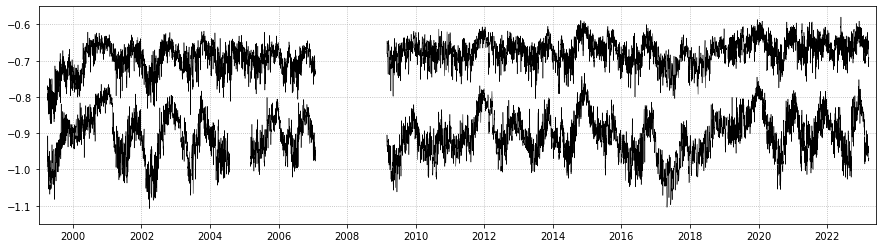

In [8]:
import gsw 
fig,ax = plt.subplots(figsize=(15,4))

# colors = ['#ff0000',
# '#ffd700',
# '#c71585',
# '#00ff00',
# '#0000ff',
# '#1e90ff',
# '#7fffd4']

colors = ['#e6194B','#f58231','#ffe119','#3cb44b','#42d4f4','#4363d8','#911eb4']
# origin_direc = 'Weddell_Data_1999_2019/'
# nc_files = [filename for filename in os.listdir(origin_direc) if filename.endswith('.nc')]
# for files_i in np.arange(len(nc_files)):
#     fn = nc_files[files_i]
#     ds_dummy = xr.open_dataset('Weddell_Data_1999_2019/'+fn)
#     x = ds_dummy.temp.date
#     y = ds_dummy.temp
    
#     window_size=4*24
#     x = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().time)
    
#     t = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().temperature)
#     C = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().conductivity)
#     p = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().pressure)
#     SA = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().SA)
#     CT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().CT)
#     PT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().PT)
    
    # plt.plot(x,y,color = 'k',linewidth=1)

for i in np.arange(len(ds_M3.mooring_ID)):

    x = np.asarray(ds_M3.isel(mooring_ID=i).date)
    y = np.asarray(ds_M3.isel(mooring_ID=i).temp)
    ax.plot(x,y,linewidth=0.5,
             c='k')
    
i = 0
origin_direc = 'M3_netCDF_1999_2023/Weddell_Data_2019_2023/'
nc_files = [filename for filename in os.listdir(origin_direc) if filename.endswith('.nc')]
print(len(nc_files))
for files_i in np.arange(len(nc_files)):
    
    fn = nc_files[files_i]
    print(fn)
    
    if fn == 'M3_SBE37_u10172.nc' or fn == 'M3_SBE37_u14763.nc':
        
        ds_dummy = xr.open_dataset('M3_netCDF_1999_2023/Weddell_Data_2019_2023/'+fn)
    
        p_max = np.nanmean(ds_dummy.pressure)+np.nanstd(ds_dummy.pressure)
        p_min = np.nanmean(ds_dummy.pressure)-np.nanstd(ds_dummy.pressure)
        ds_dummy = ds_dummy.where(ds_dummy.pressure<p_max,drop=True)
        ds_dummy = ds_dummy.where(ds_dummy.pressure>p_min,drop=True)
    
        # print(np.max(np.diff(ds_dummy.PT)))
        window_size=4*24
        x = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().time)
    
    
        t = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().temperature)
        C = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().conductivity)
        p = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().pressure)
        SA = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().SA)
        CT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().CT)
        PT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().PT)
        
        if np.sum(np.asarray(~np.isnan(CT))*1)==0:
            SA = np.full(t.shape,34.645)
        
            CT = gsw.conversions.CT_from_t(SA, t, p)
            
            PT = gsw.conversions.pt_from_CT(SA, CT)

        
        lbl = fn[9:-3]#+': '+str(np.int(np.nanmean(ds_dummy.pressure)))+' m'

        print(lbl)
        print(np.nanmean(np.asarray(ds_dummy.depth)))
        # print('z: ',np.nanmean(gsw.conversions.p_from_z(p, 63.5, geo_strf_dyn_height=0, sea_surface_geopotential=0)))
        # print(x,PT)
        print('')
        ax.plot(x,PT,linewidth=0.5,label=lbl,c='k')
        # plt.plot(x,t,color = 'r',linewidth=1)
        i+=1
        
import numpy.ma as ma
import matplotlib.dates as mdates
# Set the x-axis tick labels to show every other year
years = mdates.YearLocator()
date_format = mdates.DateFormatter('%Y')
# Set the x-axis ticks to show every 2 years
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(date_format)


ax.set_ylim(-1.15,-0.55)
# plt.ylim(29.75,30.4)
# plt.xlim(np.datetime64('2019-01-01T00:00:00.000000000'),np.datetime64('2023-03-01T00:00:00.000000000'))

ax.set_xlim(np.datetime64('1999-01-01T00:00:00.000000000'),np.datetime64('2023-06-01T00:00:00.000000000'))
# plt.legend(ncol=5)
plt.grid(linestyle='dotted')
# plt.title('M3 extended time series')

6
M3_SBE37_u14763.nc
u14763
-4549.18539738696

M3_SBE39_tp1310.nc
M3_SBE37_u16961.nc
M3_SBE37_u10172.nc
u10172
-4099.603001227334

M3_SBE39_tp1826.nc
M3_SBE37_u14764.nc


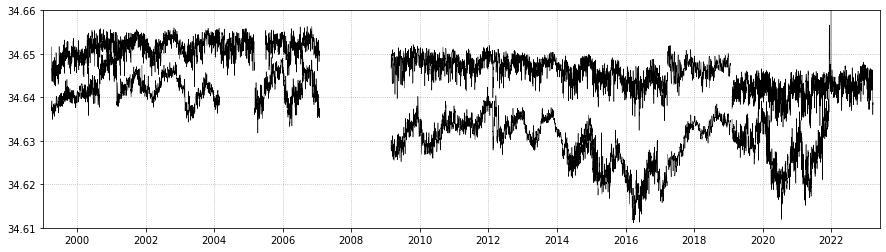

In [9]:
import gsw 
fig, ax = plt.subplots(figsize=(15,4))
window_size=4*24
# window_size=4*24*30*25




colors = ['#e6194B','#f58231','#ffe119','#3cb44b','#42d4f4','#4363d8','#911eb4']
# origin_direc = 'Weddell_Data_1999_2019/'
# nc_files = [filename for filename in os.listdir(origin_direc) if filename.endswith('.nc')]
# for files_i in np.arange(len(nc_files)):
#     fn = nc_files[files_i]
#     ds_dummy = xr.open_dataset('Weddell_Data_1999_2019/'+fn)
#     x = ds_dummy.temp.date
#     y = ds_dummy.temp
    
#     window_size=4*24
#     x = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().time)
    
#     t = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().temperature)
#     C = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().conductivity)
#     p = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().pressure)
#     SA = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().SA)
#     CT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().CT)
#     PT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().PT)
    
    # plt.plot(x,y,color = 'k',linewidth=1)

for i in np.arange(len(ds_M3.mooring_ID)):

    x = np.asarray(ds_M3.isel(mooring_ID=i).date)
    # y = np.asarray(ds_wed.isel(mooring_ID=i).temp)
    SP = np.asarray(ds_M3.isel(mooring_ID=i).sal)
    z = np.asarray(ds_M3.isel(mooring_ID=i).depth)
    # lat = np.asarray(ds_wed.isel(mooring_ID=i).latitude)
    lat = 63.5
    lon = 41.8
    # lon = np.asarray(ds_wed.isel(mooring_ID=i).longitude)
    p = gsw.conversions.p_from_z(z, lat, geo_strf_dyn_height=0, sea_surface_geopotential=0)
    SA = gsw.conversions.SA_from_SP(SP, p, lon, lat)
    ax.plot(x,SP,linewidth=0.5,
             c='k')
    
i = 0
origin_direc = 'M3_netCDF_1999_2023/Weddell_Data_2019_2023/'
nc_files = [filename for filename in os.listdir(origin_direc) if filename.endswith('.nc')]
print(len(nc_files))
for files_i in np.arange(len(nc_files)):
    
    fn = nc_files[files_i]
    print(fn)
    
    if fn == 'M3_SBE37_u10172.nc' or fn == 'M3_SBE37_u14763.nc':
        
        ds_dummy = xr.open_dataset('M3_netCDF_1999_2023/Weddell_Data_2019_2023/'+fn)
    
        p_max = np.nanmean(ds_dummy.pressure)+np.nanstd(ds_dummy.pressure)
        p_min = np.nanmean(ds_dummy.pressure)-np.nanstd(ds_dummy.pressure)
        ds_dummy = ds_dummy.where(ds_dummy.pressure<p_max,drop=True)
        ds_dummy = ds_dummy.where(ds_dummy.pressure>p_min,drop=True)
    
        # print(np.max(np.diff(ds_dummy.PT)))
        
        x = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().time)
    
    
        t = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().temperature)
        C = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().conductivity)
        p = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().pressure)
        SA = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().SA)
        CT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().CT)
        PT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().PT)
        
        if np.sum(np.asarray(~np.isnan(CT))*1)==0:
            SA = np.full(t.shape,34.645)
        
            CT = gsw.conversions.CT_from_t(SA, t, p)
            
            PT = gsw.conversions.pt_from_CT(SA, CT)

        
        lbl = fn[9:-3]#+': '+str(np.int(np.nanmean(ds_dummy.pressure)))+' m'

        print(lbl)
        print(np.nanmean(np.asarray(ds_dummy.depth)))
        # print('z: ',np.nanmean(gsw.conversions.p_from_z(p, 63.5, geo_strf_dyn_height=0, sea_surface_geopotential=0)))
        # print(x,PT)
        print('')
        ax.plot(x,SA,linewidth=0.5,label=lbl,c='k')
        # plt.plot(x,t,color = 'r',linewidth=1)
        i+=1

import numpy.ma as ma
import matplotlib.dates as mdates
# Set the x-axis tick labels to show every other year
years = mdates.YearLocator()
date_format = mdates.DateFormatter('%Y')
# Set the x-axis ticks to show every 2 years
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(date_format)

# plt.ylim(-1.15,-0.55)
ax.set_ylim(34.61,34.66)
# plt.ylim(34.61,35)
# plt.ylim(29.75,30.4)
# plt.xlim(np.datetime64('2019-01-01T00:00:00.000000000'),np.datetime64('2023-03-01T00:00:00.000000000'))

ax.set_xlim(np.datetime64('1999-01-01T00:00:00.000000000'),np.datetime64('2023-06-01T00:00:00.000000000'))
# plt.legend(ncol=5)
plt.grid(linestyle='dotted')
# plt.title('M3 extended time series')

M3_SBE37_u14763.nc
M3_SBE37_u16961.nc
M3_SBE37_u10172.nc
M3_SBE37_u14764.nc
M3_SBE39_tp1310.nc
M3_SBE39_tp1826.nc


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


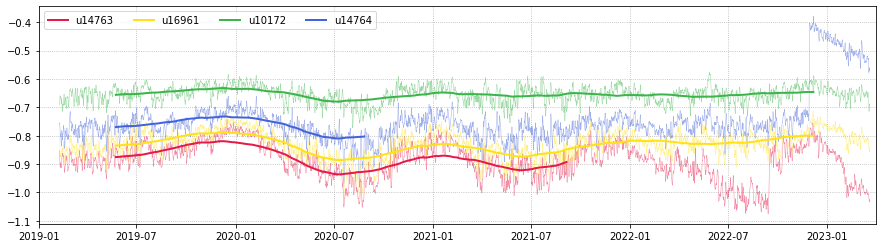

In [10]:
import gsw 
# plt.figure(figsize=(15,8))
plt.figure(figsize=(15,4))


# colors = ['#ff0000',
# '#ffd700',
# '#c71585',
# '#00ff00',
# '#0000ff',
# '#1e90ff',
# '#7fffd4']

colors = ['#e6194B','#f58231','#ffe119','#3cb44b','#42d4f4','#4363d8','#911eb4']

i = 0
# origin_direc = 'Weddell_Data_2019_2023/'
origin_direc = 'M3_netCDF_1999_2023/Weddell_Data_2019_2023/'
nc_files = [filename for filename in os.listdir(origin_direc) if filename.endswith('.nc')]
# print(len(nc_files))
for files_i in np.arange(len(nc_files)):
    
    fn = nc_files[files_i]
    # print(fn)
    ds_dummy = xr.open_dataset('M3_netCDF_1999_2023/Weddell_Data_2019_2023/'+fn)
    
    p_max = np.nanmean(ds_dummy.pressure)+np.nanstd(ds_dummy.pressure)
    p_min = np.nanmean(ds_dummy.pressure)-np.nanstd(ds_dummy.pressure)
    ds_dummy = ds_dummy.where(ds_dummy.pressure<p_max,drop=True)
    ds_dummy = ds_dummy.where(ds_dummy.pressure>p_min,drop=True)
    
    # print(np.max(np.diff(ds_dummy.PT)))
    window_size=4*24
    x = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().time)
    
    t = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().temperature)
    C = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().conductivity)
    p = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().pressure)
    SA = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().SA)
    CT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().CT)
    PT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().PT)
        
    if np.sum(np.asarray(~np.isnan(CT))*1)==0:
        SA = np.full(t.shape,34.645)
        
        CT = gsw.conversions.CT_from_t(SA, t, p)
            
        PT = gsw.conversions.pt_from_CT(SA, CT)
#     else:
        
#         plt.plot(x,SA,linewidth=0.5,alpha=0.5,c=colors[i])
    
    if fn != 'M3_SBE39_tp1826.nc' and fn != 'M3_SBE39_tp1310.nc':
        print(fn)
        plt.plot(x,CT,linewidth=0.5,alpha=0.5,c=colors[i])
        
        ### No u14764 after 2020-07
        ### No u14763 after 2021-07
        ### No u16961 after 2022-07
#         if fn == 'M3_SBE37_u14764.nc':
            

# M3_SBE37_u14763.nc
# M3_SBE37_u16961.nc
# M3_SBE37_u10172.nc
# M3_SBE37_u14764.nc
# M3_SBE39_tp1310.nc
# M3_SBE39_tp1826.nc       
        
    

    # plt.plot(x,PT,linewidth=0.5,alpha =0.5,c=colors[i])
    i+=1

i=0
for files_i in np.arange(len(nc_files)):
    
    fn = nc_files[files_i]
    # print(fn)
    ds_dummy = xr.open_dataset('M3_netCDF_1999_2023/Weddell_Data_2019_2023/'+fn)
    lbl = fn[9:-3]
    
    p_max = np.nanmean(ds_dummy.pressure)+np.nanstd(ds_dummy.pressure)
    p_min = np.nanmean(ds_dummy.pressure)-np.nanstd(ds_dummy.pressure)
    ds_dummy = ds_dummy.where(ds_dummy.pressure<p_max,drop=True)
    ds_dummy = ds_dummy.where(ds_dummy.pressure>p_min,drop=True)
    
    # print(np.max(np.diff(ds_dummy.PT)))
    window_size=4*24*30*7
    x = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().time)
    
    t = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().temperature)
    C = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().conductivity)
    p = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().pressure)
    SA = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().SA)
    CT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().CT)
    PT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().PT)
        
    if np.sum(np.asarray(~np.isnan(CT))*1)==0:
        print(fn)
        SA = np.full(t.shape,34.645)
        
        CT = gsw.conversions.CT_from_t(SA, t, p)
            
        PT = gsw.conversions.pt_from_CT(SA, CT)
        
    if fn != 'M3_SBE39_tp1826.nc' and fn != 'M3_SBE39_tp1310.nc':
        
        if fn == 'M3_SBE37_u14763.nc':
            x1 = x
            CT1 = CT
            plt.plot(x1[:-54000],CT1[:-54000],linewidth=2,alpha=1,label=lbl,c=colors[i])
            
        elif fn ==  'M3_SBE37_u14764.nc': 
            x2 = x
            CT2 = CT
            plt.plot(x2[:-90000],CT2[:-90000],linewidth=2,alpha=1,label=lbl,c=colors[i])
            
        else:
            plt.plot(x,CT,linewidth=2,alpha=1,label=lbl,c=colors[i])
    
    

    # if fn == 'M3_SBE37_u14764.nc':
    #     PT = PT[:-25300]
    #     x = x[:-25300]
    
    # print(np.nanmean(np.asarray(ds_dummy.depth)))
    # print('')
    # plt.plot(x,SA,linewidth=2,alpha=1,label=lbl,c=colors[i])
    i+=1


# plt.ylim(-1.15,-0.55)
# plt.ylim(34.61,34.66)
# plt.ylim(29.75,30.4)
plt.xlim(np.datetime64('2019-01-01T00:00:00.000000000'),np.datetime64('2023-04-01T00:00:00.000000000'))

# plt.xlim(np.datetime64('1999-01-01T00:00:00.000000000'),np.datetime64('2023-06-01T00:00:00.000000000'))
plt.legend(ncol=5)
plt.grid(linestyle='dotted')
# plt.title('M3 extended time series')

In [11]:
np.arange(len(nc_files))

array([0, 1, 2, 3, 4, 5])

M3_SBE37_u14763.nc
u14763

4643.669433735191
M3_SBE39_tp1310.nc
tp1310

4323.179993340743
M3_SBE37_u16961.nc
u16961

4544.65002682205
M3_SBE37_u10172.nc
u10172

4180.406643555845
M3_SBE39_tp1826.nc
tp1826

4587.761788486265
M3_SBE37_u14764.nc
u14764

4413.412110865391


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


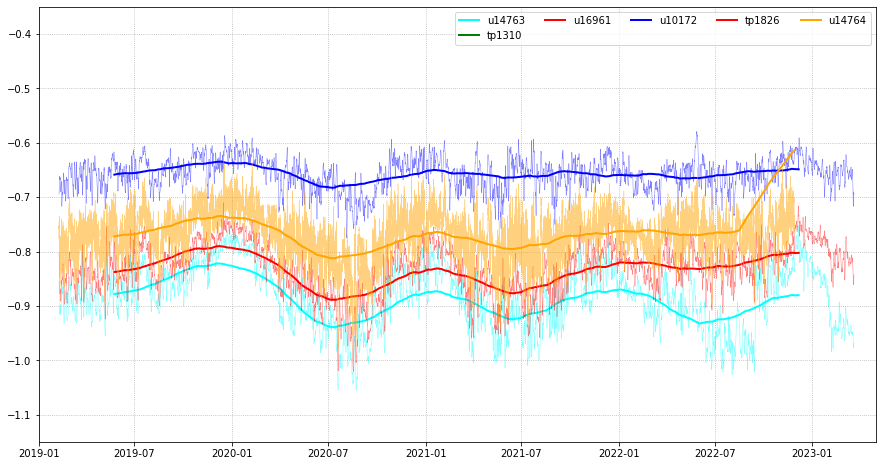

In [12]:
import gsw 
plt.figure(figsize=(15,8))
    
origin_direc = 'M3_netCDF_1999_2023/Weddell_Data_2019_2023/'
nc_files = [filename for filename in os.listdir(origin_direc) if filename.endswith('.nc')]
colors = ['aqua','green','red','blue','red','orange']
i = 0
for files_i in np.arange(len(nc_files)):
    fn = nc_files[files_i]
    print(fn)
    
    # if fn != 'M3_SBE39_tp1826.nc' and fn != 'M3_SBE39_tp1310.nc':
    if fn != 'I dont feel like deleting this loop but its unneccessary':
        ds_dummy = xr.open_dataset('M3_netCDF_1999_2023/Weddell_Data_2019_2023/'+fn)
    
        p_max = np.nanmean(ds_dummy.pressure)+np.nanstd(ds_dummy.pressure)
        p_min = np.nanmean(ds_dummy.pressure)-np.nanstd(ds_dummy.pressure)
        ds_dummy = ds_dummy.where(ds_dummy.pressure<p_max,drop=True)
        ds_dummy = ds_dummy.where(ds_dummy.pressure>p_min,drop=True)

        ### Daily mean
        window_size=4*24
        x = np.asarray(ds_dummy.temperature.rolling(time=window_size, center=True).mean().time)
        t = np.asarray(ds_dummy.temperature.rolling(time=window_size, center=True).mean())
        C = np.asarray(ds_dummy.conductivity.rolling(time=window_size, center=True).mean())
        p = np.asarray(ds_dummy.pressure.rolling(time=window_size, center=True).mean())
        SA = np.asarray(ds_dummy.SA.rolling(time=window_size, center=True).mean())
        CT = np.asarray(ds_dummy.CT.rolling(time=window_size, center=True).mean())
        PT = np.asarray(ds_dummy.PT.rolling(time=window_size, center=True).mean())
        
        # print(np.asarray(ds_dummy.mooring_ID).squeeze())
        print(fn[9:-3])
        print('')
    
        bad_id = (np.argwhere((np.diff(np.asarray(ds_dummy.PT))>0.2)))
        if len(bad_id)>0:     
            PT = np.asarray(ds_dummy.PT)[:int(bad_id.squeeze())]
            x = x[:int(bad_id.squeeze())]
            plt.plot(x,PT,linewidth=0.5,c=colors[i],alpha=0.5)
    
        else:
            plt.plot(x,PT,linewidth=0.5,c=colors[i],alpha=0.5)
    
        ### 7-month rolling mean
        window_size=4*24*30*7
        x = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().time)
        t = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().temperature)
        C = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().conductivity)
        p = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().pressure)
        SA = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().SA)
        CT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().CT)
        PT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().PT)
        lbl = fn[9:-3]#+': '+str(np.int(np.nanmean(ds_dummy.pressure)))+' m'
        # plt.plot(x,PT,linewidth=2,label=lbl,c=colors[i])
        bad_id = (np.argwhere((np.diff(np.asarray(ds_dummy.PT))>0.2)))
        if len(bad_id)>0:     

            bad_time = ds_dummy.isel(time=bad_id.squeeze()).time
            x = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().time)
            PT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().PT)
            PT = PT[:np.argwhere(x==np.asarray(bad_time)).squeeze()]
            x = x[:np.argwhere(x==np.asarray(bad_time)).squeeze()]
            # PT = PT[:10000]
            # x = x[:10000]
            plt.plot(x,PT,linewidth=2,label=lbl,c=colors[i])
        # print(x[:5])
        else:
            plt.plot(x,PT,linewidth=2,label=lbl,c=colors[i])
        print(float(ds_dummy.pressure.mean()))
        i+=1


plt.ylim(-1.15,-0.35)
plt.xlim(np.datetime64('2019-01-01T00:00:00.000000000'),np.datetime64('2023-05-01T00:00:00.000000000'))

# plt.xlim(np.datetime64('1999-01-01T00:00:00.000000000'),np.datetime64('2023-06-01T00:00:00.000000000'))
plt.legend(ncol=5)
plt.grid(linestyle='dotted')
# plt.title('M3 extended time series')

In [13]:
colors[4]

'red'

M3_SBE37_u14763.nc
M3_SBE37_u16961.nc
M3_SBE37_u10172.nc
M3_SBE37_u14764.nc
M3_SBE39_tp1310.nc
M3_SBE39_tp1826.nc


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


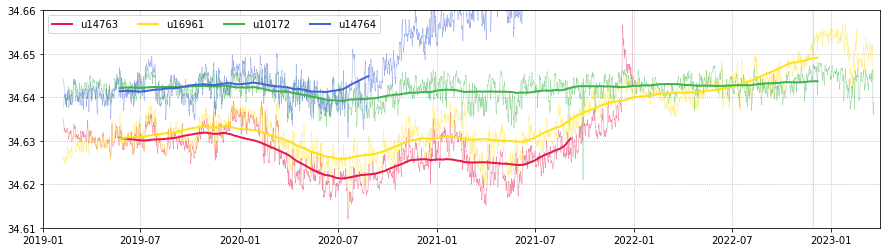

In [14]:
import gsw 
# plt.figure(figsize=(15,8))
plt.figure(figsize=(15,4))


# colors = ['#ff0000',
# '#ffd700',
# '#c71585',
# '#00ff00',
# '#0000ff',
# '#1e90ff',
# '#7fffd4']

colors = ['#e6194B','#f58231','#ffe119','#3cb44b','#42d4f4','#4363d8','#911eb4']

i = 0
# origin_direc = 'Weddell_Data_2019_2023/'
origin_direc = 'M3_netCDF_1999_2023/Weddell_Data_2019_2023/'
nc_files = [filename for filename in os.listdir(origin_direc) if filename.endswith('.nc')]
# print(len(nc_files))
for files_i in np.arange(len(nc_files)):
    
    fn = nc_files[files_i]
    # print(fn)
    ds_dummy = xr.open_dataset('M3_netCDF_1999_2023/Weddell_Data_2019_2023/'+fn)
    
    p_max = np.nanmean(ds_dummy.pressure)+np.nanstd(ds_dummy.pressure)
    p_min = np.nanmean(ds_dummy.pressure)-np.nanstd(ds_dummy.pressure)
    ds_dummy = ds_dummy.where(ds_dummy.pressure<p_max,drop=True)
    ds_dummy = ds_dummy.where(ds_dummy.pressure>p_min,drop=True)
    
    # print(np.max(np.diff(ds_dummy.PT)))
    window_size=4*24
    x = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().time)
    
    t = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().temperature)
    C = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().conductivity)
    p = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().pressure)
    SA = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().SA)
    CT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().CT)
    PT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().PT)
        
    if np.sum(np.asarray(~np.isnan(CT))*1)==0:
        SA = np.full(t.shape,34.645)
        
        CT = gsw.conversions.CT_from_t(SA, t, p)
            
        PT = gsw.conversions.pt_from_CT(SA, CT)
#     else:
        
#         plt.plot(x,SA,linewidth=0.5,alpha=0.5,c=colors[i])
    
        
    
    if fn != 'M3_SBE39_tp1826.nc' and fn != 'M3_SBE39_tp1310.nc':
        print(fn)
        plt.plot(x,SA,linewidth=0.5,alpha=0.5,c=colors[i])
        
        ### No u14764 after 2020-07
        ### No u14763 after 2021-07
        ### No u16961 after 2022-07
#         if fn == 'M3_SBE37_u14764.nc':
            

# M3_SBE37_u14763.nc
# M3_SBE37_u16961.nc
# M3_SBE37_u10172.nc
# M3_SBE37_u14764.nc
# M3_SBE39_tp1310.nc
# M3_SBE39_tp1826.nc       
        
    

    # plt.plot(x,PT,linewidth=0.5,alpha =0.5,c=colors[i])
    i+=1

i=0
for files_i in np.arange(len(nc_files)):
    
    fn = nc_files[files_i]
    # print(fn)
    ds_dummy = xr.open_dataset('M3_netCDF_1999_2023/Weddell_Data_2019_2023/'+fn)
    lbl = fn[9:-3]
    
    p_max = np.nanmean(ds_dummy.pressure)+np.nanstd(ds_dummy.pressure)
    p_min = np.nanmean(ds_dummy.pressure)-np.nanstd(ds_dummy.pressure)
    ds_dummy = ds_dummy.where(ds_dummy.pressure<p_max,drop=True)
    ds_dummy = ds_dummy.where(ds_dummy.pressure>p_min,drop=True)
    
    # print(np.max(np.diff(ds_dummy.PT)))
    window_size=4*24*30*7
    x = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().time)
    
    t = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().temperature)
    C = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().conductivity)
    p = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().pressure)
    SA = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().SA)
    CT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().CT)
    PT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().PT)
        
    if np.sum(np.asarray(~np.isnan(CT))*1)==0:
        print(fn)
        SA = np.full(t.shape,34.645)
        
        CT = gsw.conversions.CT_from_t(SA, t, p)
            
        PT = gsw.conversions.pt_from_CT(SA, CT)
        
    if fn != 'M3_SBE39_tp1826.nc' and fn != 'M3_SBE39_tp1310.nc':
        
        if fn == 'M3_SBE37_u14763.nc':
            x1 = x
            SA1 = SA
            plt.plot(x1[:-54000],SA1[:-54000],linewidth=2,alpha=1,label=lbl,c=colors[i])
            
        elif fn ==  'M3_SBE37_u14764.nc': 
            x2 = x
            SA2 = SA
            plt.plot(x2[:-90000],SA2[:-90000],linewidth=2,alpha=1,label=lbl,c=colors[i])
            
        else:
            plt.plot(x,SA,linewidth=2,alpha=1,label=lbl,c=colors[i])
    
    

    # if fn == 'M3_SBE37_u14764.nc':
    #     PT = PT[:-25300]
    #     x = x[:-25300]
    
    # print(np.nanmean(np.asarray(ds_dummy.depth)))
    # print('')
    # plt.plot(x,SA,linewidth=2,alpha=1,label=lbl,c=colors[i])
    i+=1


# plt.ylim(-1.15,-0.55)
plt.ylim(34.61,34.66)
# plt.ylim(29.75,30.4)
plt.xlim(np.datetime64('2019-01-01T00:00:00.000000000'),np.datetime64('2023-04-01T00:00:00.000000000'))

# plt.xlim(np.datetime64('1999-01-01T00:00:00.000000000'),np.datetime64('2023-06-01T00:00:00.000000000'))
plt.legend(ncol=5)
plt.grid(linestyle='dotted')
# plt.title('M3 extended time series')

0


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


1


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset
/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


1


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


2


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


3


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset
/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


3


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


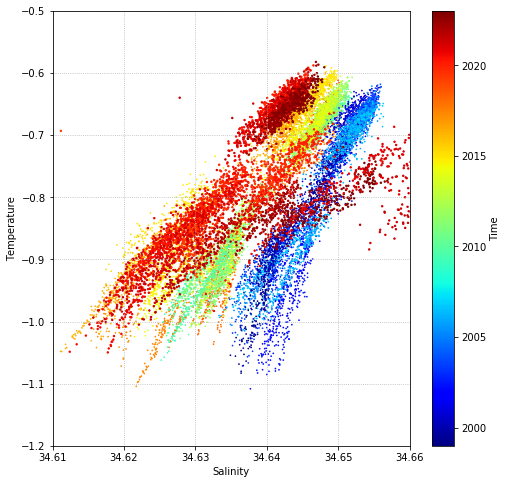

In [15]:
plt.figure(figsize=(8,8))

### Old M3 data
### recreate TS diagram from 2020 GRL paper

for i in np.arange(len(ds_M3.mooring_ID)):

    dates = np.asarray(ds_M3.isel(mooring_ID=i).date)
    dt_array = dates
    # extract year and day of year from strings
    year = np.asarray([dt.year for dt in pd.to_datetime(dt_array)])
    day_of_year = np.asarray([dt.dayofyear for dt in pd.to_datetime(dt_array)])
    # calculate decimal year
    total_days_in_year = np.array([366 if y % 4 == 0 and (y % 100 != 0 or y % 400 == 0) else 365 for y in year])
    decimal_year = (day_of_year - 1) / total_days_in_year + year

    # y = np.asarray(ds_wed.isel(mooring_ID=i).temp)
    temp = np.asarray(ds_M3.isel(mooring_ID=i).temp)
    SP = np.asarray(ds_M3.isel(mooring_ID=i).sal)
    z = np.asarray(ds_M3.isel(mooring_ID=i).depth)
    # lat = np.asarray(ds_wed.isel(mooring_ID=i).latitude)
    lat = 63.5
    lon = 41.8
    # lon = np.asarray(ds_wed.isel(mooring_ID=i).longitude)
    p = gsw.conversions.p_from_z(z, lat, geo_strf_dyn_height=0, sea_surface_geopotential=0)
    SA = gsw.conversions.SA_from_SP(SP, p, lon, lat)
    plt.scatter(SP,temp,s=0.5,
             c=decimal_year,cmap='jet',vmin=1999,vmax=2023,
               marker='o',facecolor=None)


    
sensors = ['o','+','s','x']
i = 0
# origin_direc = 'Weddell_Data_2019_2023/'
origin_direc = 'M3_netCDF_1999_2023/Weddell_Data_2019_2023/'
nc_files = [filename for filename in os.listdir(origin_direc) if filename.endswith('.nc')]
# print(len(nc_files))
for files_i in np.arange(len(nc_files)):
    print(i)
    fn = nc_files[files_i]
    ds_dummy = xr.open_dataset('M3_netCDF_1999_2023/Weddell_Data_2019_2023/'+fn)
    # Sort the dataset along the time dimension
    ds_dummy = ds_dummy.sortby('time')
    ds_dummy = ds_dummy.resample(time='1D').mean()
    
    # p_max = np.nanmean(ds_dummy.pressure)+np.nanstd(ds_dummy.pressure)
    # p_min = np.nanmean(ds_dummy.pressure)-np.nanstd(ds_dummy.pressure)
    # ds_dummy = ds_dummy.where(ds_dummy.pressure<p_max,drop=True)
    # ds_dummy = ds_dummy.where(ds_dummy.pressure>p_min,drop=True)
    
    # window_size=4*24*30#*7
    # # x = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().time)
    # t = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().temperature)
    # C = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().conductivity)
    # p = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().pressure)
    # SA = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().SA)
    # CT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().CT)
    # PT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().PT)
    
    # ds_dummy['year'] = (np.asarray(pd.to_datetime(np.asarray(ds_dummy.time)).year))    
    # years = np.asarray(ds_dummy.year)
    
    times = np.asarray(pd.to_datetime(np.asarray(ds_dummy.time)))
    
    t = np.asarray(ds_dummy.temperature)
    C = np.asarray(ds_dummy.conductivity)
    p = np.asarray(ds_dummy.pressure)
    SA = np.asarray(ds_dummy.SA)
    CT = np.asarray(ds_dummy.CT)
    PT = np.asarray(ds_dummy.PT)
        
    if np.sum(np.asarray(~np.isnan(CT))*1)==0:
        SA = np.full(t.shape,34.645)
        
        CT = gsw.conversions.CT_from_t(SA, t, p)
            
        PT = gsw.conversions.pt_from_CT(SA, CT)

    
    if fn != 'M3_SBE39_tp1826.nc' and fn != 'M3_SBE39_tp1310.nc':
        # plt.scatter(SA,PT,c=colors[i],s=0.5)#,linewidth=0.5,alpha=0.5,c=colors[i])
        # lvls = np.linspace(2019,2023,5)
        # plt.scatter(SA,PT,c=years,cmap='jet',vmin=2019,vmax=2023,s=0.5)
        dt_array = times

        # extract year and day of year from strings
        year = np.asarray([dt.year for dt in pd.to_datetime(dt_array)])
        day_of_year = np.asarray([dt.dayofyear for dt in pd.to_datetime(dt_array)])

        # calculate decimal year
        total_days_in_year = np.array([366 if y % 4 == 0 and (y % 100 != 0 or y % 400 == 0) else 365 for y in year])
        decimal_year = (day_of_year - 1) / total_days_in_year + year

        plt.scatter(SA,PT,marker=sensors[0],c=decimal_year,cmap='jet',s=2,vmin=1999, vmax=2023)
    
        i+=1





plt.ylim(-1.2,-0.5)
plt.xlim(34.61, 34.66)

# plt.legend(ncol=5)
# # add colorbar
# cbar = plt.colorbar()
# cbar.set_label('Time')

# add colorbar with custom tick labels
cbar = plt.colorbar()
# cbar.ax.yaxis.set_major_formatter(['2019','2020','2021','2022','2023'])
# cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: str(int(x))))
cbar.set_label('Time')

plt.grid(linestyle='dotted')
# set axis labels
plt.ylabel('Temperature')
plt.xlabel('Salinity')
plt.show()


0


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


1


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset
/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


1


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


2


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


3


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset
/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


3


/opt/anaconda3/envs/BoB/lib/python3.7/site-packages/xarray/core/common.py:1106: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


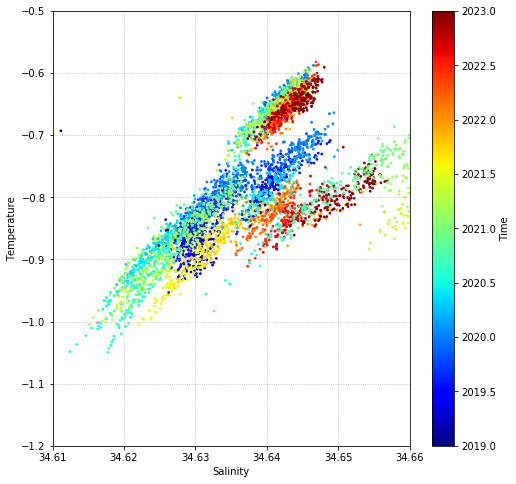

In [16]:
import gsw 
# plt.figure(figsize=(15,8))
# plt.figure(figsize=(15,4))
plt.figure(figsize=(8,8))

# colors = ['#ff0000',
# '#ffd700',
# '#c71585',
# '#00ff00',
# '#0000ff',
# '#1e90ff',
# '#7fffd4']

colors = ['#e6194B','#f58231','#ffe119','#3cb44b','#42d4f4','#4363d8','#911eb4']
sensors = ['o','+','s','x']
i = 0
# origin_direc = 'Weddell_Data_2019_2023/'
origin_direc = 'M3_netCDF_1999_2023/Weddell_Data_2019_2023/'
nc_files = [filename for filename in os.listdir(origin_direc) if filename.endswith('.nc')]
# print(len(nc_files))
for files_i in np.arange(len(nc_files)):
    print(i)
    fn = nc_files[files_i]
    ds_dummy = xr.open_dataset('M3_netCDF_1999_2023/Weddell_Data_2019_2023/'+fn)
    # Sort the dataset along the time dimension
    ds_dummy = ds_dummy.sortby('time')
    ds_dummy = ds_dummy.resample(time='1D').mean()
    
    
    # p_max = np.nanmean(ds_dummy.pressure)+np.nanstd(ds_dummy.pressure)
    # p_min = np.nanmean(ds_dummy.pressure)-np.nanstd(ds_dummy.pressure)
    # ds_dummy = ds_dummy.where(ds_dummy.pressure<p_max,drop=True)
    # ds_dummy = ds_dummy.where(ds_dummy.pressure>p_min,drop=True)
    
    # window_size=4*24*30#*7
    # # x = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().time)
    # t = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().temperature)
    # C = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().conductivity)
    # p = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().pressure)
    # SA = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().SA)
    # CT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().CT)
    # PT = np.asarray(ds_dummy.rolling(time=window_size, center=True).mean().PT)
    
    ds_dummy['year'] = (np.asarray(pd.to_datetime(np.asarray(ds_dummy.time)).year))    
    years = np.asarray(ds_dummy.year)
    
    times = np.asarray(pd.to_datetime(np.asarray(ds_dummy.time)))
    
    t = np.asarray(ds_dummy.temperature)
    C = np.asarray(ds_dummy.conductivity)
    p = np.asarray(ds_dummy.pressure)
    SA = np.asarray(ds_dummy.SA)
    CT = np.asarray(ds_dummy.CT)
    PT = np.asarray(ds_dummy.PT)
        
    if np.sum(np.asarray(~np.isnan(CT))*1)==0:
        SA = np.full(t.shape,34.645)
        
        CT = gsw.conversions.CT_from_t(SA, t, p)
            
        PT = gsw.conversions.pt_from_CT(SA, CT)

    
    if fn != 'M3_SBE39_tp1826.nc' and fn != 'M3_SBE39_tp1310.nc':
        # plt.scatter(SA,PT,c=colors[i],s=0.5)#,linewidth=0.5,alpha=0.5,c=colors[i])
        # lvls = np.linspace(2019,2023,5)
        # plt.scatter(SA,PT,c=years,cmap='jet',vmin=2019,vmax=2023,s=0.5)
        dt_array = times

        # extract year and day of year from strings
        year = np.asarray([dt.year for dt in pd.to_datetime(dt_array)])
        day_of_year = np.asarray([dt.dayofyear for dt in pd.to_datetime(dt_array)])

        # calculate decimal year
        total_days_in_year = np.array([366 if y % 4 == 0 and (y % 100 != 0 or y % 400 == 0) else 365 for y in year])
        decimal_year = (day_of_year - 1) / total_days_in_year + year
        cmap = plt.cm.get_cmap('jet')
        plt.scatter(SA,PT,marker=sensors[0], c=decimal_year,cmap='jet',s=3,vmin=2019, vmax=2023)
    
        i+=1

# plt.figure(figsize=(8,8))
plt.ylim(-1.2,-0.5)
plt.xlim(34.61, 34.66)

# plt.legend(ncol=5)
# # add colorbar
# cbar = plt.colorbar()
# cbar.set_label('Time')

# add colorbar with custom tick labels
cbar = plt.colorbar()
# cbar.ax.yaxis.set_major_formatter(['2019','2020','2021','2022','2023'])
# cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: str(int(x))))
cbar.set_label('Time')

plt.grid(linestyle='dotted')
# set axis labels
plt.ylabel('Temperature')
plt.xlabel('Salinity')
plt.show()


# Correlate M2 and M3 time series

Time series from deepest sensors

M2: u14765

M3: u14763

In [17]:
### Select deepest M2 time series
ds_M2_deep = ds5

In [18]:
### Select deepest M3 time series
ds_M3_deep = xr.open_dataset('M3_netCDF_1999_2023/Weddell_Data_2019_2023/M3_SBE37_u14763.nc')

Mean M2 pressure =  3056.1380664747676
Mean M3 pressure =  4642.8824092393


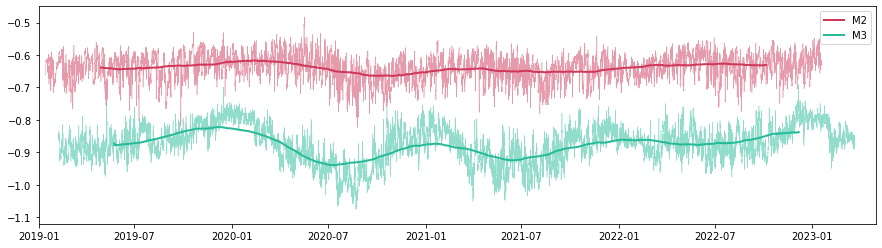

Rolling mean correlation
Correlation coefficient: 0.6684438995874534
p-value: 0.0


In [238]:
###----------------------------------------------------------------------------###
###----------------------------------------------------------------------------###
###                                                                            ###
###                    Caluclate rolling mean time series                      ###
###                                                                            ###
###----------------------------------------------------------------------------###
###----------------------------------------------------------------------------###
window_size=4*24*30*7 # 7-month rolling mean

x_M2 = np.asarray(ds_M2_deep.time)
t_M2 = np.asarray(ds_M2_deep.temperature)
C_M2 = np.asarray(ds_M2_deep.conductivity)
# p_M2 = np.asarray(ds_M2_deep.pressure)
p_M2 = ds_M2_deep.attrs['pressure']
print('Mean M2 pressure = ',np.nanmean(p_M2))

SA_M2 = np.full(t_M2.shape,34.645)
CT_M2 = gsw.conversions.CT_from_t(SA_M2, t_M2, p_M2)
PT_M2 = gsw.conversions.pt_from_CT(SA_M2, CT_M2)
ds_M2_deep['SA'] = ('time',np.asarray(SA_M2))
ds_M2_deep['CT'] = ('time',np.asarray(CT_M2))
ds_M2_deep['PT'] = ('time',np.asarray(PT_M2))

x_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().time)
t_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().temperature)
C_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().conductivity)
p_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().pressure)
SA_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().SA)
CT_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().CT)
PT_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().PT)



x_M3 = np.asarray(ds_M3_deep.time)
t_M3 = np.asarray(ds_M3_deep.temperature)
C_M3 = np.asarray(ds_M3_deep.conductivity)
p_M3 = np.asarray(ds_M3_deep.pressure)
print('Mean M3 pressure = ',np.nanmean(p_M3))

SA_M3 = np.full(t_M3.shape,34.645)
CT_M3 = gsw.conversions.CT_from_t(SA_M3, t_M3, p_M3)
PT_M3 = gsw.conversions.pt_from_CT(SA_M3, CT_M3)
ds_M3_deep['SA'] = ('time',np.asarray(SA_M3))
ds_M3_deep['CT'] = ('time',np.asarray(CT_M3))
ds_M3_deep['PT'] = ('time',np.asarray(PT_M3))

x_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().time)
t_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().temperature)
C_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().conductivity)
p_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().pressure)
SA_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().SA)
CT_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().CT)
PT_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().PT)

###----------------------------------------------------------------------------###
###----------------------------------------------------------------------------###
###                                                                            ###
###                         Plot time series                                   ###
###                                                                            ###
###----------------------------------------------------------------------------###
###----------------------------------------------------------------------------###


plt.figure(figsize=(15,4))

plt.plot(x_M2,PT_M2,c='#CF385B',alpha=0.5,linewidth=0.5)
plt.plot(x_mean_M2,PT_mean_M2,c='#CF385B',linewidth=2,label='M2')

plt.plot(x_M3[13:-15],PT_M3[13:-15],c='#26BB98',alpha=0.5,linewidth=0.5)
plt.plot(x_mean_M3[1500:],PT_mean_M3[1500:],c='#26BB98',linewidth=2,label='M3')

plt.ylim(-1.12,-0.45)
plt.xlim(np.datetime64('2019-01-01T00:00:00.000000000'),np.datetime64('2023-05-01T00:00:00.000000000'))

plt.legend()
plt.show()  



###----------------------------------------------------------------------------###
###----------------------------------------------------------------------------###
###                                                                            ###
###                    Correlate rolling mean time series                      ###
###                                                                            ###
###----------------------------------------------------------------------------###
###----------------------------------------------------------------------------###

# Convert the data arrays into numpy arrays
time1 = x_mean_M2
time2 = x_mean_M3[1500:]
data1 = np.asarray(PT_mean_M2)
data2 = np.asarray(PT_mean_M3[1500:])

time1 = time1[~np.isnan(data1)]
time2 = time2[~np.isnan(data2)]
data1 = data1[~np.isnan(data1)]
data2 = data2[~np.isnan(data2)]

time1 = time1 - np.timedelta64(1, 's')
mutual_times = np.asarray(myfun.intersection(time1,time2))

# Find the indices where time1 and time2 equals mutual_times
indices1 = np.where(np.isin(time1, mutual_times))[0]
indices2 = np.where(np.isin(time2, mutual_times))[0]

time1 = time1[indices1]
time2 = time2[indices2]

data1 = data1[indices1]
data2 = data2[indices2]

# Calculate the Pearson correlation coefficient and the p-value
correlation, p_value = pearsonr(data1, data2)

print('Rolling mean correlation')
# Print the correlation coefficient
print("Correlation coefficient:", correlation)

# Print the p-value
print("p-value:", p_value)


In [136]:
# ###----------------------------------------------------------------------------###
# ###----------------------------------------------------------------------------###
# ###                                                                            ###
# ###                    Caluclate rolling mean time series                      ###
# ###                                                                            ###
# ###----------------------------------------------------------------------------###
# ###----------------------------------------------------------------------------###
# window_size=4*24*30 # Monthly

# x_M2 = np.asarray(ds_M2_deep.time)
# t_M2 = np.asarray(ds_M2_deep.temperature)
# C_M2 = np.asarray(ds_M2_deep.conductivity)
# # p_M2 = np.asarray(ds_M2_deep.pressure)
# p_M2 = ds_M2_deep.attrs['pressure']
# print('Mean M2 pressure = ',np.nanmean(p_M2))

# SA_M2 = np.full(t_M2.shape,34.645)
# CT_M2 = gsw.conversions.CT_from_t(SA_M2, t_M2, p_M2)
# PT_M2 = gsw.conversions.pt_from_CT(SA_M2, CT_M2)
# ds_M2_deep['SA'] = ('time',np.asarray(SA_M2))
# ds_M2_deep['CT'] = ('time',np.asarray(CT_M2))
# ds_M2_deep['PT'] = ('time',np.asarray(PT_M2))

# x_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().time)
# t_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().temperature)
# C_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().conductivity)
# p_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().pressure)
# SA_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().SA)
# CT_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().CT)
# PT_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().PT)



# x_M3 = np.asarray(ds_M3_deep.time)
# t_M3 = np.asarray(ds_M3_deep.temperature)
# C_M3 = np.asarray(ds_M3_deep.conductivity)
# p_M3 = np.asarray(ds_M3_deep.pressure)
# print('Mean M3 pressure = ',np.nanmean(p_M3))

# SA_M3 = np.full(t_M3.shape,34.645)
# CT_M3 = gsw.conversions.CT_from_t(SA_M3, t_M3, p_M3)
# PT_M3 = gsw.conversions.pt_from_CT(SA_M3, CT_M3)
# ds_M3_deep['SA'] = ('time',np.asarray(SA_M3))
# ds_M3_deep['CT'] = ('time',np.asarray(CT_M3))
# ds_M3_deep['PT'] = ('time',np.asarray(PT_M3))

# x_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().time)
# t_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().temperature)
# C_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().conductivity)
# p_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().pressure)
# SA_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().SA)
# CT_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().CT)
# PT_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().PT)

# ###----------------------------------------------------------------------------###
# ###----------------------------------------------------------------------------###
# ###                                                                            ###
# ###                         Plot time series                                   ###
# ###                                                                            ###
# ###----------------------------------------------------------------------------###
# ###----------------------------------------------------------------------------###


# plt.figure(figsize=(15,4))

# plt.plot(x_M2,PT_M2,c='#CF385B',alpha=0.5,linewidth=0.5)
# plt.plot(x_mean_M2,PT_mean_M2,c='#CF385B',linewidth=2,label='M2')

# plt.plot(x_M3[13:-15],PT_M3[13:-15],c='#26BB98',alpha=0.5,linewidth=0.5)
# plt.plot(x_mean_M3[1500:],PT_mean_M3[1500:],c='#26BB98',linewidth=2,label='M3')

# plt.ylim(-1.12,-0.45)
# plt.xlim(np.datetime64('2019-01-01T00:00:00.000000000'),np.datetime64('2023-05-01T00:00:00.000000000'))

# plt.legend()
# plt.show()  



# ###----------------------------------------------------------------------------###
# ###----------------------------------------------------------------------------###
# ###                                                                            ###
# ###                    Correlate rolling mean time series                      ###
# ###                                                                            ###
# ###----------------------------------------------------------------------------###
# ###----------------------------------------------------------------------------###

# # Convert the data arrays into numpy arrays
# time1 = x_mean_M2
# time2 = x_mean_M3[1500:]
# data1 = np.asarray(PT_mean_M2)
# data2 = np.asarray(PT_mean_M3[1500:])

# time1 = time1[~np.isnan(data1)]
# time2 = time2[~np.isnan(data2)]
# data1 = data1[~np.isnan(data1)]
# data2 = data2[~np.isnan(data2)]

# time1 = time1 - np.timedelta64(1, 's')
# mutual_times = np.asarray(myfun.intersection(time1,time2))

# # Find the indices where time1 and time2 equals mutual_times
# indices1 = np.where(np.isin(time1, mutual_times))[0]
# indices2 = np.where(np.isin(time2, mutual_times))[0]

# time1 = time1[indices1]
# time2 = time2[indices2]

# data1 = data1[indices1]
# data2 = data2[indices2]

# # Calculate the Pearson correlation coefficient and the p-value
# correlation, p_value = pearsonr(data1, data2)

# print('Rolling mean correlation')
# # Print the correlation coefficient
# print("Correlation coefficient:", correlation)

# # Print the p-value
# print("p-value:", p_value)


Mean M2 pressure =  3056.1380664747676
Mean M3 pressure =  4642.8824092393


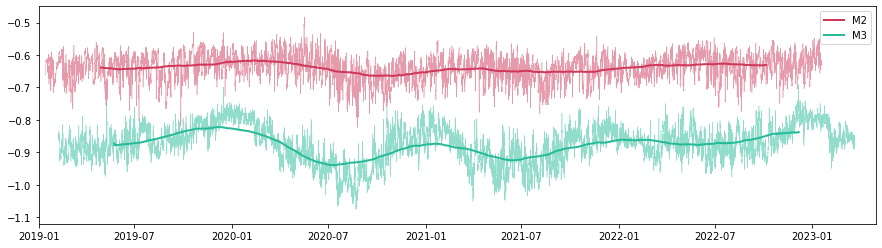

3 month lag


ValueError: x and y must have the same length.

In [240]:
###----------------------------------------------------------------------------###
###----------------------------------------------------------------------------###
###                                                                            ###
###                    Caluclate rolling mean time series                      ###
###                                                                            ###
###----------------------------------------------------------------------------###
###----------------------------------------------------------------------------###
window_size=4*24*30*7 # 7-month rolling mean

x_M2 = np.asarray(ds_M2_deep.time)
t_M2 = np.asarray(ds_M2_deep.temperature)
C_M2 = np.asarray(ds_M2_deep.conductivity)
# p_M2 = np.asarray(ds_M2_deep.pressure)
p_M2 = ds_M2_deep.attrs['pressure']
print('Mean M2 pressure = ',np.nanmean(p_M2))

SA_M2 = np.full(t_M2.shape,34.645)
CT_M2 = gsw.conversions.CT_from_t(SA_M2, t_M2, p_M2)
PT_M2 = gsw.conversions.pt_from_CT(SA_M2, CT_M2)
ds_M2_deep['SA'] = ('time',np.asarray(SA_M2))
ds_M2_deep['CT'] = ('time',np.asarray(CT_M2))
ds_M2_deep['PT'] = ('time',np.asarray(PT_M2))

x_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().time)
t_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().temperature)
C_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().conductivity)
p_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().pressure)
SA_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().SA)
CT_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().CT)
PT_mean_M2 = np.asarray(ds_M2_deep.rolling(time=window_size, center=True).mean().PT)



x_M3 = np.asarray(ds_M3_deep.time)
t_M3 = np.asarray(ds_M3_deep.temperature)
C_M3 = np.asarray(ds_M3_deep.conductivity)
p_M3 = np.asarray(ds_M3_deep.pressure)
print('Mean M3 pressure = ',np.nanmean(p_M3))

SA_M3 = np.full(t_M3.shape,34.645)
CT_M3 = gsw.conversions.CT_from_t(SA_M3, t_M3, p_M3)
PT_M3 = gsw.conversions.pt_from_CT(SA_M3, CT_M3)
ds_M3_deep['SA'] = ('time',np.asarray(SA_M3))
ds_M3_deep['CT'] = ('time',np.asarray(CT_M3))
ds_M3_deep['PT'] = ('time',np.asarray(PT_M3))

x_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().time)
t_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().temperature)
C_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().conductivity)
p_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().pressure)
SA_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().SA)
CT_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().CT)
PT_mean_M3 = np.asarray(ds_M3_deep.rolling(time=window_size, center=True).mean().PT)

###----------------------------------------------------------------------------###
###----------------------------------------------------------------------------###
###                                                                            ###
###                         Plot time series                                   ###
###                                                                            ###
###----------------------------------------------------------------------------###
###----------------------------------------------------------------------------###


plt.figure(figsize=(15,4))

plt.plot(x_M2,PT_M2,c='#CF385B',alpha=0.5,linewidth=0.5)
plt.plot(x_mean_M2,PT_mean_M2,c='#CF385B',linewidth=2,label='M2')

plt.plot(x_M3[13:-15],PT_M3[13:-15],c='#26BB98',alpha=0.5,linewidth=0.5)
plt.plot(x_mean_M3[1500:],PT_mean_M3[1500:],c='#26BB98',linewidth=2,label='M3')

plt.ylim(-1.12,-0.45)
plt.xlim(np.datetime64('2019-01-01T00:00:00.000000000'),np.datetime64('2023-05-01T00:00:00.000000000'))

plt.legend()
plt.show()  



###----------------------------------------------------------------------------###
###----------------------------------------------------------------------------###
###                                                                            ###
###                    Correlate rolling mean time series                      ###
###                           with a lag!                                      ###
###                                                                            ###
###----------------------------------------------------------------------------###
###----------------------------------------------------------------------------###

# Convert the data arrays into numpy arrays
time1 = x_mean_M2
time2 = x_mean_M3[1500:]
data1 = np.asarray(PT_mean_M2)
data2 = np.asarray(PT_mean_M3[1500:])

time1 = time1[~np.isnan(data1)]
time2 = time2[~np.isnan(data2)]
data1 = data1[~np.isnan(data1)]
data2 = data2[~np.isnan(data2)]

time1 = time1 - np.timedelta64(1, 's') ### Shift M2 data by one second

### Use pandas to shift time1
lag = 3 # months
print(lag,'month lag')
result = pd.to_datetime(time1) - pd.DateOffset(months=lag)
shifted_time1 = np.asarray(result) ### PROBLEM: shifted_time1 has duplicates

### Find where the two time arrays are the same
mutual_times = np.asarray(myfun.intersection(shifted_time1,time2))

# Find the indices where time1 and time2 equals mutual_times
indices1 = np.where(np.isin(shifted_time1, mutual_times))[0]
indices2 = np.where(np.isin(time2, mutual_times))[0]

data1 = data1[indices1]
data2 = data2[indices2]

# Calculate the Pearson correlation coefficient and the p-value
correlation, p_value = pearsonr(data1, data2)

print('Rolling mean correlation')
# Print the correlation coefficient
print("Correlation coefficient:", correlation)

# Print the p-value
print("p-value:", p_value)


In [241]:
### Find where the two time arrays are the same
mutual_times = np.asarray(myfun.intersection(shifted_time1,time2))

# Find the indices where time1 and time2 equals mutual_times
indices1 = np.where(np.isin(shifted_time1, mutual_times))[0]
indices2 = np.where(np.isin(time2, mutual_times))[0]

print(len(mutual_times))
print(len(indices1))
print(len(indices2))

107997
109341
107997


In [252]:
print(len(time1))
print(len(np.unique(time1)))
print('')

print(len(shifted_time1))
print(len(np.unique(shifted_time1)))

120577
120577

120577
118849


In [227]:
shifted_time1

array(['2019-01-29T00:00:00.000000000', '2019-01-29T00:15:00.000000000',
       '2019-01-29T00:30:00.000000000', ...,
       '2022-07-05T23:30:00.000000000', '2022-07-05T23:45:00.000000000',
       '2022-07-06T00:00:00.000000000'], dtype='datetime64[ns]')

In [213]:
# myfun.intersection(shifted_time1,time2)

In [223]:
mutual_times

array(['2019-06-01T00:00:00.000000000', '2019-05-28T00:00:00.000000000',
       '2019-07-13T16:00:00.000000000', ...,
       '2020-12-10T17:15:00.000000000', '2020-01-28T04:30:00.000000000',
       '2022-01-27T11:00:00.000000000'], dtype='datetime64[ns]')

In [226]:
len(time1)


120577

In [225]:
len(shifted_time1)

120577

In [222]:
len(indices2)

107997